The Libraries which are needed

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [52]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
gold_data = pd.read_csv(
    '/content/drive/MyDrive/ML_PROJECTS/Gold_Price_Prediction/gld_price_data.csv'
)


In [54]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [55]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [56]:
gold_data.shape

(2290, 6)

In [57]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [58]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [59]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


CORRELATION:
 -> Positive Correlation
 -> Negative Correlation

In [60]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
correlation = gold_data.corr(numeric_only=True)

<Axes: >

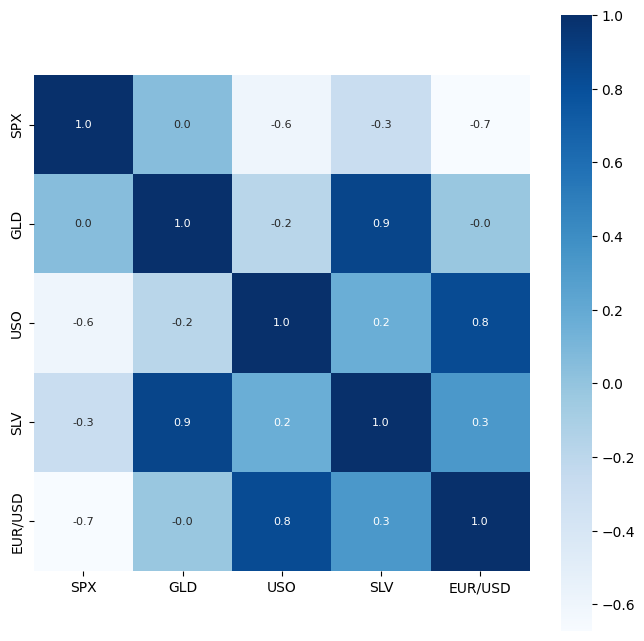

In [61]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

**Correlated Values**

In [62]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-4249945070.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='b')


<Axes: xlabel='GLD', ylabel='Density'>

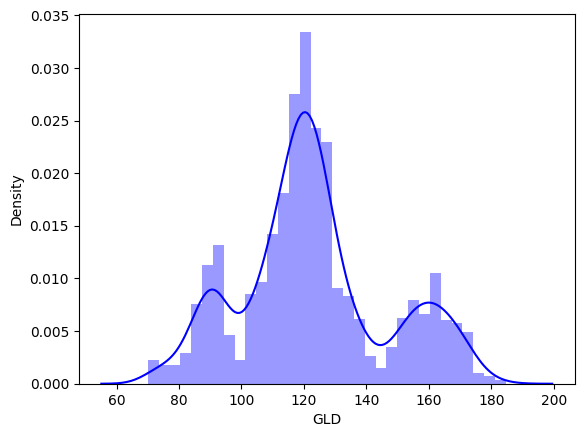

In [63]:
sns.distplot(gold_data['GLD'], color='b')

**Split the Test and Train Data**

In [64]:
x = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [65]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [66]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

**Model Training using Random Forest Regressor**

In [68]:
regressor = RandomForestRegressor(n_estimators=100)

In [69]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [70]:
predicted_values = regressor.predict(x_test)

In [71]:
print(predicted_values)

[168.46059924  81.69209988 115.98430031 127.60550078 120.72810171
 154.84589732 150.42489833 126.19159982 117.52649886 125.96570091
 116.80550073 172.5223007  141.61179877 167.74459862 115.11130022
 117.89110031 139.00170291 169.63780066 159.46820291 156.68949939
 155.15040029 125.28710016 176.22179891 157.6203029  125.23140035
  93.84329979  77.20230047 120.80140013 119.07839971 167.57639921
  88.10470053 125.25480046  91.1311004  117.52990021 121.11829895
 136.00190114 115.60340113 114.55790064 147.60229998 107.22440117
 104.34730269  87.35339802 126.58670053 117.66909971 153.65609955
 119.61289993 108.34300001 108.03619857  93.16650034 127.14139771
  75.19640008 113.57699904 121.38010064 111.39039894 118.95169914
 120.90539904 160.0966993  168.33170103 146.9146971   85.82749835
  94.20800039  86.7069995   90.51450034 118.95330063 126.41550074
 127.48010017 169.30270041 122.22689957 117.39159916  98.43360029
 168.31210118 143.36909827 131.9288023  121.16200242 121.02479913
 119.83930

In [72]:
error_score = metrics.r2_score(y_test, predicted_values)
print('Error score is: ',error_score)

Error score is:  0.9893396954105562


**Comparing using a Plot**

In [73]:
y_test = list(y_test)

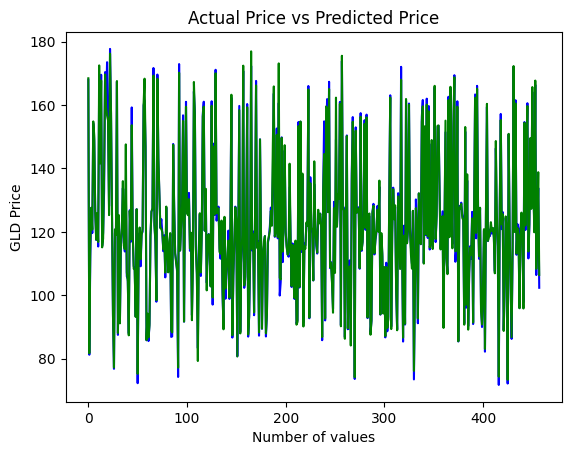

In [74]:
plt.plot(y_test, color='b', label='Actual Value')
plt.plot(predicted_values, color='g', label='Predicted Values')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
#plt.legend()
plt.show()

In [106]:
ls /content

drive/  Gold-Price-Prediction/  sample_data/


In [107]:
!mkdir Gold-Price-Prediction

mkdir: cannot create directory ‘Gold-Price-Prediction’: File exists


In [111]:
cd Gold-Price-Prediction/

/content/Gold-Price-Prediction


In [115]:
mkdir notebook

In [117]:
cd ..

/content


In [119]:
!mv /content/Gold_price_Prediction.ipynb /content/Gold-Price-Prediction/notebook

In [121]:
!ls /content/Gold-Price-Prediction/notebook


Gold_price_Prediction.ipynb


In [122]:
cd /content/Gold-Price-Prediction/

/content/Gold-Price-Prediction


In [124]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/Gold-Price-Prediction/.git/


In [129]:
# This is fully Python, safe, no shell commands
gitignore_content = """__pycache__/
*.pyc
.ipynb_checkpoints/
data/
.env
"""

with open(".gitignore", "w") as f:
    f.write(gitignore_content)


In [132]:
"""# Gold Price Prediction using Machine Learning

This project predicts gold prices using historical data.
Currently, the dataset is loaded from Google Drive for ease of development.

## Features
- Predicts gold price trends using machine learning models
- Easy-to-update dataset for future improvements
- Clean project structure for notebooks, data, and models
- Ready for CI/CD pipelines in future iterations

## Project Structure
Gold-Price-Prediction/
    notebooks/      # Colab notebooks
        gold_price_prediction.ipynb
    data/           # Datasets (ignored in GitHub)
    models/         # Saved models (ignored in GitHub)
    README.md       # Project description
    .gitignore      # Files/folders to ignore in Git

## Tech Stack
- Python
- Pandas
- Scikit-learn
- Google Colab

## Author
Khushi Goel

## Future Work
- Replace Google Drive dataset with live Indian gold price APIs
- Implement CI/CD pipelines for automated training and deployment
- Version control for datasets and models
"""

# Write to README.md
with open("README.md", "w") as f:
    f.write(readme_content)
